# Linear Regression Predicting 

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [53]:
df1 = pd.read_csv('funding_data.csv')
df2 = pd.read_csv('company_with_predictions.csv')
df3 = pd.read_csv('company_with_prediction_range.csv')
df2 = df2.drop(df2.columns[[0]], axis=1)
df3 = df3.drop(df3.columns[[0]], axis=1)
df2.head()

,weighted_predict,company
0,0.882353,Airbnb
1,0.985507,Amazon
2,3.651413,Apple
3,0.000000,Asana
4,0.000000,Buzzfeed


In [54]:
newdf1 = pd.merge(df1,df2,how='inner',on=['company'])
newdf2 = pd.merge(df1,df3,how='inner',on=['company'])
newdf1 = newdf1.drop('size', 1)
newdf2 = newdf2.drop('size', 1)
newdf1 = newdf1[np.isfinite(newdf1['funding'])]
newdf2 = newdf2[np.isfinite(newdf2['funding'])]


,company,funding,age,public,funding_rounds,weighted_predict_range
0,Google,26.10,17,1,3,-0.058065
1,Apple,0.25,39,1,1,0.071332
2,Amazon,8.00,21,1,1,0.057971
3,Uber,8210.00,6,0,13,-0.054054
4,Lyft,1010.00,3,0,8,-0.082192
5,Airbnb,3890.00,7,0,8,-0.294118
6,Fitbit,66.00,8,1,4,0.000000
7,Jawbone,818.80,16,0,12,0.000000
9,Coursera,146.10,3,0,6,0.000000
10,Twitter,1160.00,9,1,8,0.000000


In [71]:
newdf1

,company,funding,age,public,funding_rounds,weighted_predict
0,Google,26.10,17,1,3,3.490323
1,Apple,0.25,39,1,1,3.651413
2,Amazon,8.00,21,1,1,0.985507
3,Uber,8210.00,6,0,13,0.810811
4,Lyft,1010.00,3,0,8,0.972603
5,Airbnb,3890.00,7,0,8,0.882353
6,Fitbit,66.00,8,1,4,0.786885
7,Jawbone,818.80,16,0,12,0.000000
9,Coursera,146.10,3,0,6,0.500000
10,Twitter,1160.00,9,1,8,0.882353


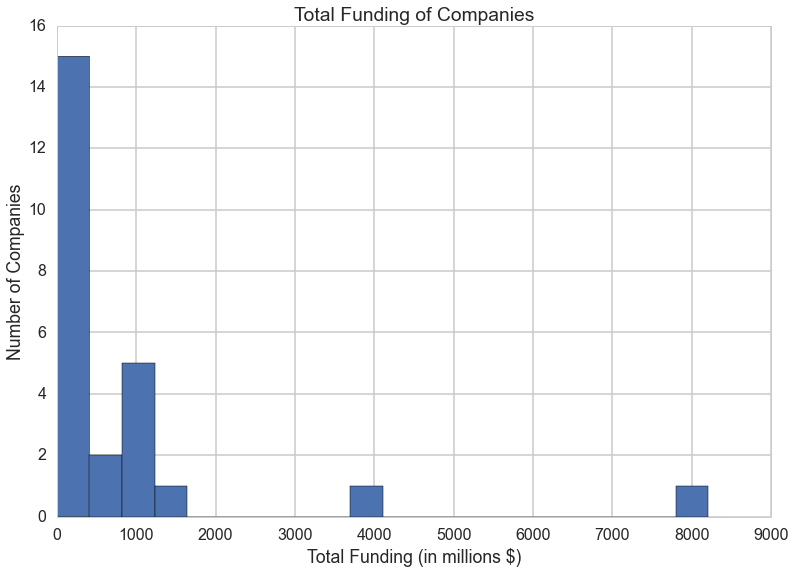

In [65]:
plt.hist(newdf1.funding,bins=20)
plt.title("Total Funding of Companies")
plt.xlabel("Total Funding (in millions $)")
plt.ylabel("Number of Companies")

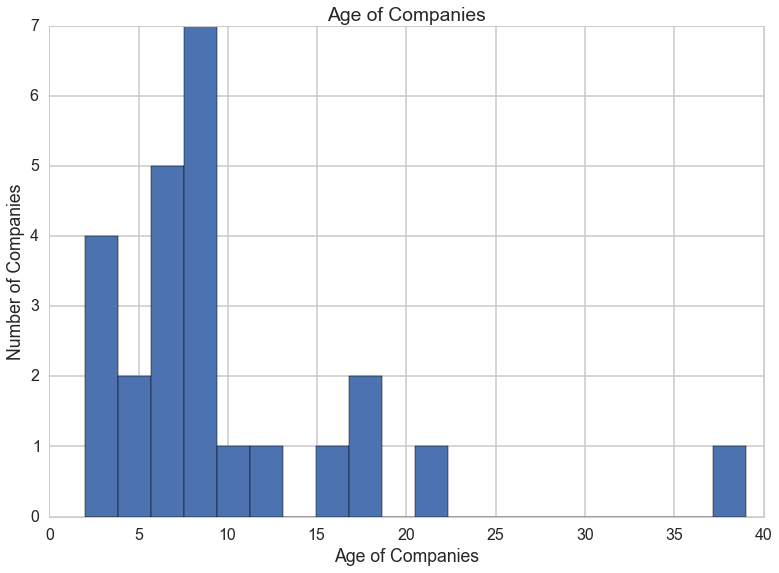

In [67]:
plt.hist(newdf1.age,bins=20)
plt.title("Age of Companies")
plt.xlabel("Age of Companies")
plt.ylabel("Number of Companies")

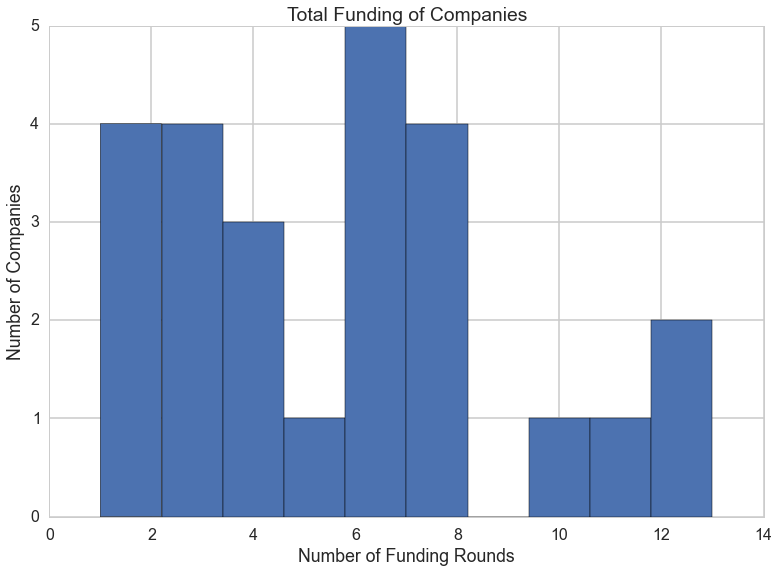

In [69]:
plt.hist(newdf1.funding_rounds,bins=10)
plt.title("Total Funding of Companies")
plt.xlabel("Number of Funding Rounds")
plt.ylabel("Number of Companies")

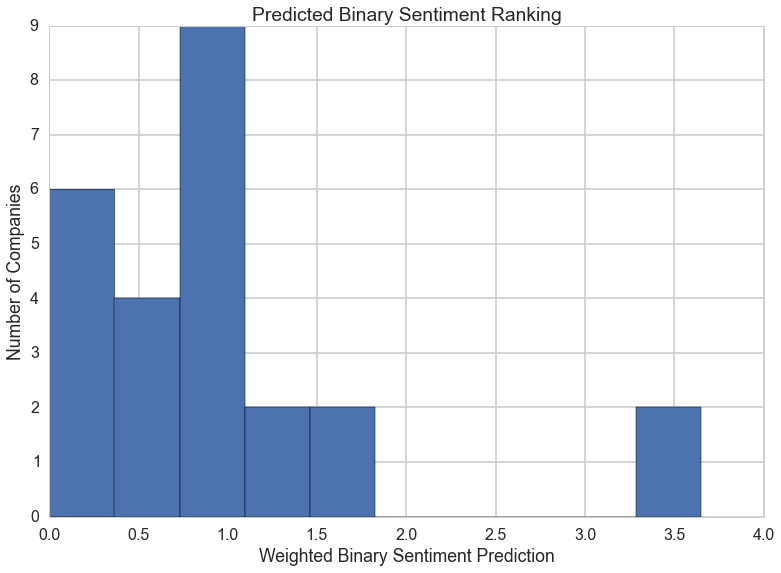

In [73]:
plt.hist(newdf1.weighted_predict,bins=10)
plt.title("Predicted Binary Sentiment Ranking")
plt.xlabel("Weighted Binary Sentiment Prediction")
plt.ylabel("Number of Companies")

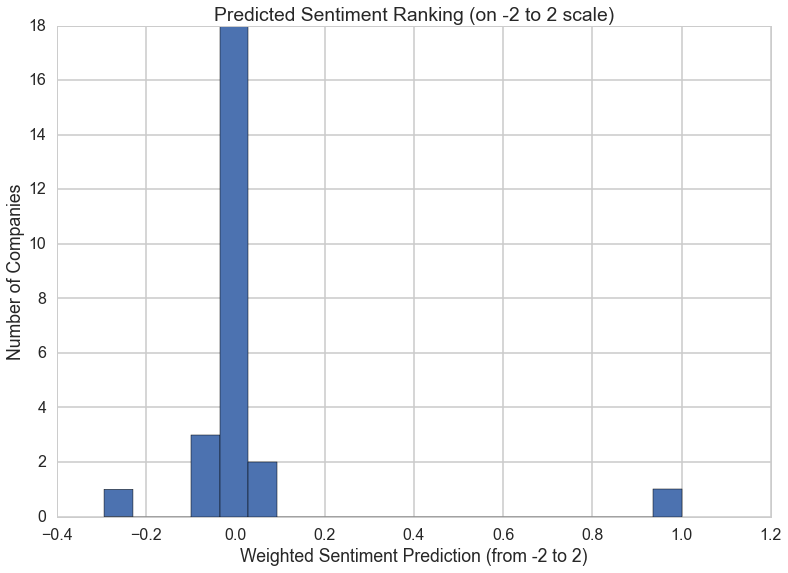

In [75]:
plt.hist(newdf2.weighted_predict_range,bins=20)
plt.title("Predicted Sentiment Ranking (on -2 to 2 scale)")
plt.xlabel("Weighted Sentiment Prediction (from -2 to 2)")
plt.ylabel("Number of Companies")

In [76]:
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

In [78]:
ols_model1 = ols('funding ~ age + public + funding_rounds + weighted_predict', newdf1).fit()
ols_model2 = ols('funding ~ age + public + funding_rounds + weighted_predict_range', newdf2).fit()

In [79]:
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                funding   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     3.880
Date:                Wed, 09 Dec 2015   Prob (F-statistic):             0.0172
Time:                        18:13:24   Log-Likelihood:                -214.35
No. Observations:                  25   AIC:                             438.7
Df Residuals:                      20   BIC:                             444.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept        -1152.3377    811.485     -1.420      0.171     -2845.066   540.390
age                  5.1265     52.433      0.098      0.923      -104.246   114.499
public            -648.1823    745.405     -0.870      0.395     -2203.070   906.706
funding_rounds     326.4468     92.299      3.537      0.002       133.915   518.979
weighted_predict   352.3713    417.552      0.844      0.409      -518.626  1223.369
==============================================================================
Omnibus:                       25.862   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.261
Skew:                           1.972   Prob(JB):                     1.22e-11
Kurtosis:                       8.718   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                funding   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     4.239
Date:                Wed, 09 Dec 2015   Prob (F-statistic):             0.0120
Time:                        18:20:33   Log-Likelihood:                -213.85
No. Observations:                  25   AIC:                             437.7
Df Residuals:                      20   BIC:                             443.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept              -1149.6279    792.345     -1.451      0.162     -2802.430   503.174
age                       31.7100     44.319      0.715      0.483       -60.739   124.159
public                  -568.3725    718.110     -0.791      0.438     -2066.324   929.579
funding_rounds           340.2444     91.431      3.721      0.001       149.523   530.966
weighted_predict_range -1694.2836   1360.808     -1.245      0.228     -4532.879  1144.312
==============================================================================
Omnibus:                       22.404   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.155
Skew:                           1.613   Prob(JB):                     2.58e-10
Kurtosis:                       8.656   Cond. No.                         63.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
plt.scatter()

In [183]:
# import data file downloaded from Crunchbase database
crunchbasedf = pd.read_csv('crunchbase_export.csv')

# import list of companies that we did sentiment analysis on
companies_list = pd.read_csv('companies.csv').company.tolist()

# make all company names lowercase for easier comparison
companies_list = [x.lower() for x in companies_list]
lowercase = lambda x: str(x).lower()
crunchbasedf.name = crunchbasedf.name.apply(lowercase)

In [160]:
# create formatter that changes string into proper format 
# (for some reason, the data in crunchbasedf is formatted 
# really weirdly, requiring me to do this)

def formatter(string):
    space = False
    formatted = ""
    for s in string:
        if space and (s is not ' '):
            formatted += s
        elif s == ' ':
            space = True
    return formatted

In [181]:
# ************************************************ #
# CREATE DATAFRAME WITH ONLY THE COMPANIES WE NEED #
# ************************************************ #

# declare lists of relevant demographics data we will be using
first_funding_date = []
last_funding_date = []
funding_total = []
founded_date = []
public = []
funding_rounds = []
new_companies_list = []

# iterate through list of companies to extract information for each of those companies
for company in companies_list:
    # check if company is in crunchbasedf
    if company in crunchbasedf.name.tolist():
        # only include companies in crunchbasedf
        new_companies_list.append(company)
        
        # create public variable
        if formatter(crunchbasedf[crunchbasedf.name==company].status.to_string()).strip() == "ipo":
            public.append(1)
        else:
            public.append(0)

        # create funding rounds variable
        funding_rounds.append(int(formatter(crunchbasedf[crunchbasedf.name==company].funding_rounds.to_string()).strip()))

        # create total funds variable
        funding_total.append(int(formatter(crunchbasedf[crunchbasedf.name==company][' funding_total_usd '].to_string()).replace(",","").strip()))

        # create last funding date variable
        last_funding_date.append(crunchbasedf[crunchbasedf.name==company].last_funding_at.to_string()[-10:])

        # create first funding date variable
        first_funding_date.append(crunchbasedf[crunchbasedf.name==company].first_funding_at.to_string()[-10:])

        # create founded date variable
        founded_date.append(crunchbasedf[crunchbasedf.name==company].founded_at.to_string()[-10:])

dfdict = {'company':new_companies_list,'first_funding_date':first_funding_date,'last_funding_date':last_funding_date,
          'funding_total':funding_total,'founded_date':founded_date,'public':public,'funding_rounds':funding_rounds}

In [202]:
infodf = pd.DataFrame.from_dict(dfdict)

infodf.first_funding_date = infodf.first_funding_date.apply(pd.datetools.parse)
infodf.last_funding_date = infodf.last_funding_date.apply(pd.datetools.parse)

# added founded date into Vivint through other source, since Cruchbase didn't have it
infodf.loc[33,'founded_date'] = '1997-06-01'

infodf.founded_date = infodf.founded_date.apply(pd.datetools.parse)
infodf

,company,first_funding_date,founded_date,funding_rounds,funding_total,last_funding_date,public
0,facebook,2004-09-01,2004-02-04,11,2425700000,2011-01-21,1
1,google,1998-08-01,1998-09-07,3,26100000,1999-06-07,1
2,apple,1977-05-15,1976-04-01,1,250000,1977-05-15,1
3,amazon,1995-07-01,1994-07-05,1,8000000,1995-07-01,1
4,uber,2009-08-01,2009-03-01,13,8207450000,2015-09-07,0
5,lyft,2009-06-01,2012-01-01,8,1012500000,2015-05-15,0
6,airbnb,2009-01-01,2008-08-01,8,2394820000,2015-11-20,0
7,fitbit,2008-10-10,2007-05-01,4,66000000,2013-08-13,1
8,jawbone,2006-12-15,1999-01-01,12,818799995,2015-04-30,0
9,coursera,2012-04-18,2012-01-01,6,146100000,2015-10-27,0


In [209]:
import datetime
today = datetime.datetime(2015, 12, 10)
infodf['age'] = (today - infodf['founded_date']).values / np.timedelta64(1, 'D')
infodf['time_from_last_funding'] = (today - infodf['last_funding_date']).values / np.timedelta64(1, 'D')
infodf.head()

,company,first_funding_date,founded_date,funding_rounds,funding_total,last_funding_date,public,age,time_from_last_funding
0,facebook,2004-09-01,2004-02-04,11,2425700000,2011-01-21,1,4327,1784
1,google,1998-08-01,1998-09-07,3,26100000,1999-06-07,1,6303,6030
2,apple,1977-05-15,1976-04-01,1,250000,1977-05-15,1,14497,14088
3,amazon,1995-07-01,1994-07-05,1,8000000,1995-07-01,1,7828,7467
4,uber,2009-08-01,2009-03-01,13,8207450000,2015-09-07,0,2475,94
